In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('/Users/pookie/Desktop/Mining_Vibration_data/Minedata_2.csv')
df
#there are two values shown for the same direction, which means that two channel mininmate has been used 

,Tran,Vert,Long,MicL,Tran2,Vert2,Long2,MicL2
0,0.000,0.127,0.0,0.00,0.000,0.000,0.000,0.0
1,0.127,0.127,0.0,0.00,0.000,-0.127,0.127,0.0
2,0.127,0.127,0.0,0.00,0.000,0.000,0.000,0.0
3,0.000,0.127,0.0,0.00,0.000,0.000,0.000,0.0
4,0.000,0.127,0.0,0.00,-0.127,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...
3323,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0
3324,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0
3325,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0
3326,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0


In [7]:
df['Tran'].value_counts()
df['Tran2'].value_counts()

Tran2
 0.000    1866
-0.127     462
 0.127     342
-0.254     110
 0.254      98
-0.381      71
-0.635      60
 0.508      52
 0.381      49
 0.635      46
-0.508      43
-0.762      38
 0.762      26
-0.889      20
 0.889      19
 1.016      12
-1.016       5
 1.143       3
-1.270       3
-1.143       3
Name: count, dtype: int64

In [8]:
df.shape

(3328, 8)

In [9]:
import numpy as np
import pandas as pd

# Changing the sample rate to the time interval of 1/1024
# Create an array where each element follows the pattern i / 1024 for i = 1 to 3328
column = np.arange(1, 3329) / 1024

# Reshape the column into a 3328-row array with 1 column
time = column.reshape(-1, 1)

# Create a DataFrame with a single column named 'timings'
df_time = pd.DataFrame(time, columns=['time'])
df_time

,time
0,0.000977
1,0.001953
2,0.002930
3,0.003906
4,0.004883
...,...
3323,3.246094
3324,3.247070
3325,3.248047
3326,3.249023


In [10]:
df_new = pd.concat([df,df_time],axis = 'columns')
df_new

,Tran,Vert,Long,MicL,Tran2,Vert2,Long2,MicL2,time
0,0.000,0.127,0.0,0.00,0.000,0.000,0.000,0.0,0.000977
1,0.127,0.127,0.0,0.00,0.000,-0.127,0.127,0.0,0.001953
2,0.127,0.127,0.0,0.00,0.000,0.000,0.000,0.0,0.002930
3,0.000,0.127,0.0,0.00,0.000,0.000,0.000,0.0,0.003906
4,0.000,0.127,0.0,0.00,-0.127,0.000,0.000,0.0,0.004883
...,...,...,...,...,...,...,...,...,...
3323,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0,3.246094
3324,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0,3.247070
3325,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0,3.248047
3326,0.127,0.127,0.0,-0.25,0.000,0.000,0.000,0.0,3.249023


In [11]:
from matplotlib import pyplot as plt 

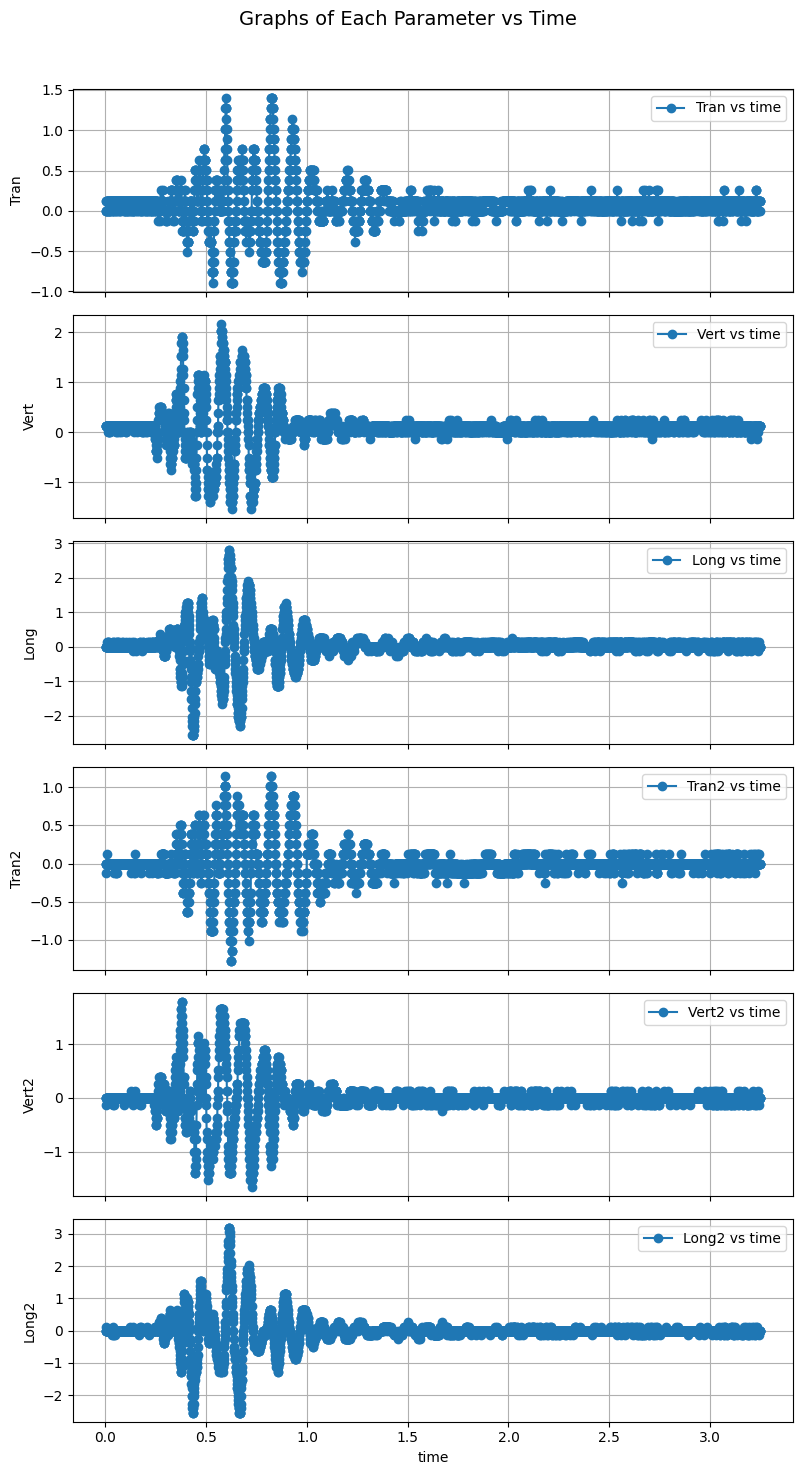

In [12]:
#specifying columns from our dataframe which we will use to plot
columns_to_plot = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(8, 15), sharex=True)
fig.suptitle("Graphs of Each Parameter vs Time", fontsize=14)

for i, column in enumerate(columns_to_plot):
    axes[i].plot(df_new["time"], df_new[column], marker='o', linestyle='-', label=f'{column} vs time')
    axes[i].set_ylabel(column)
    axes[i].grid(True)
    axes[i].legend()
#as all the plots have same x axis so only labeling the last one
axes[-1].set_xlabel("time")

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Performing FFT on velocity in one direction and find frequency corresponding to maximum amplitude**

In [13]:
#performing fft on just Tran
frequencies = np.fft.rfftfreq(3328,d=1/1024)
fft_values = np.fft.rfft(df_new['Tran'])  # FFT on only Tran as of now
amplitudes = 2 / 3328 * np.abs(fft_values)
max_value = np.max(amplitudes)
max_index = max_index = np.argmax(amplitudes)
frequencies[max_index]

np.float64(0.0)

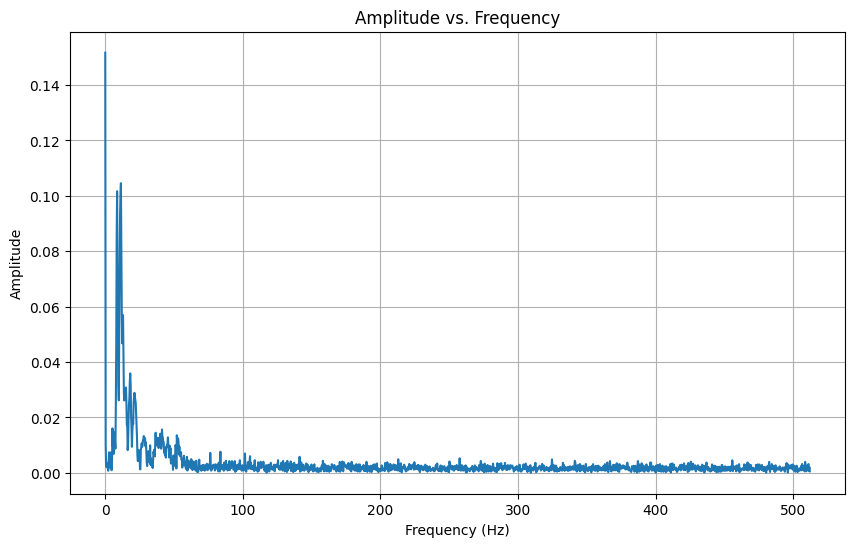

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, amplitudes)

plt.title('Amplitude vs. Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

**Now performing on all the columns which we want to change**

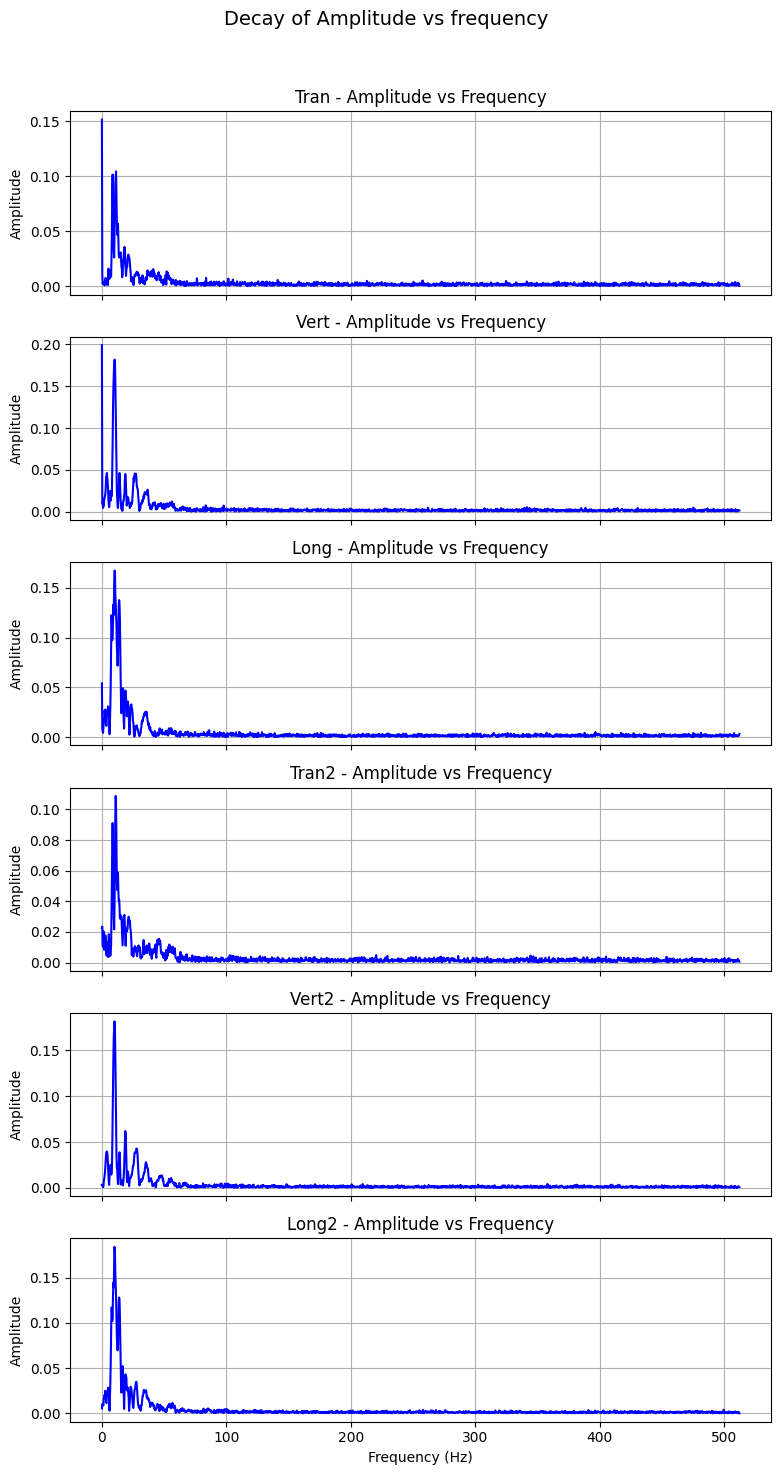

In [15]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(8, 15), sharex=True)
fig.suptitle("Decay of Amplitude vs frequency", fontsize=14)
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    axes[i].plot(frequencies, amplitudes,color='b')
    axes[i].set_title(f'{column} - Amplitude vs Frequency')
    axes[i].set_ylabel('Amplitude')
    axes[i].grid(True)
axes[-1].set_xlabel('Frequency (Hz)')
# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Finding the maximum frequency corresponding to the maximum amplitude**

In [16]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    max_value = np.max(amplitudes)
    max_index = max_index = np.argmax(amplitudes)
    print(f'Amplitudes = {max_value} , Frequency{[i]} = {frequencies[max_index]}')

Amplitudes = 0.15165204326923076 , Frequency[0] = 0.0
Amplitudes = 0.19927704326923076 , Frequency[1] = 0.0
Amplitudes = 0.16742463934926785 , Frequency[2] = 10.153846153846155
Amplitudes = 0.10876708972964091 , Frequency[3] = 11.076923076923077
Amplitudes = 0.1811261207497044 , Frequency[4] = 10.153846153846155
Amplitudes = 0.18407953808168087 , Frequency[5] = 10.153846153846155


In [17]:
columns_to_check = ["Tran", "Vert", "Long", "Tran2", "Vert2", "Long2"]
for i,column in enumerate(columns_to_check):
    frequencies = np.fft.rfftfreq(3328,d=1/1024) #only the postive ones
    fft_values = np.fft.rfft(df_new[column])  # various columns selected from the list above
    amplitudes = 2 / 3328 * np.abs(fft_values) 
    max_value = np.max(amplitudes)
    max_index = max_index = np.argmax(amplitudes)
    max_velocity = df_new[column].max()
    print(f'Velocity{[i]} = {max_velocity} , Frequency{[i]} = {frequencies[max_index]}')

Velocity[0] = 1.397 , Frequency[0] = 0.0
Velocity[1] = 2.159 , Frequency[1] = 0.0
Velocity[2] = 2.794 , Frequency[2] = 10.153846153846155
Velocity[3] = 1.143 , Frequency[3] = 11.076923076923077
Velocity[4] = 1.778 , Frequency[4] = 10.153846153846155
Velocity[5] = 3.175 , Frequency[5] = 10.153846153846155


**We will be using these points to plot velocity vs frequency along with DGMS data**